In [504]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [505]:
warnings.filterwarnings("ignore")

In [506]:
df = pd.read_csv("Music and Movie Survey DWIT (Responses) - Form Responses 1.csv")

In [507]:
df.head()

,email,timestamp,batch,gender,music_streaming_platform,language_music_primary,music_language_secondary,fav_music_genre,fav_music_genre_2,num_concerts,...,fav_tvseries_genre,movie_watching_mode,movie_preference,fav_movie_actor,fav_series_actor,fav_movie,fav_series,time_movie_week,highest_binge_hr,opp_barb
0,kinjle.nepal@deerwalk.edu.np,8/15/2023 10:16,BCA 2024,Female,Spotify,English,Hindi,Rap / HipHop,Indie,1,...,Thriller,Laptop / PC,Bollywood,Shahrukh Khan,Saif Ali Khan,Yeh Jawaani Hai Deewani,F.R.I.E.N.D.S.,3,8-Jul,Oppenheimer
1,aabiskar.shrestha@deerwalk.edu.np,8/15/2023 23:23,BCA 2024,Male,Spotify,English,Nepali,EDM / Funk,Pop,0,...,Sci-Fi,Cinema,Hollywood,Robert Downey Jr.,Oscar Isaac,Avengers: Infinity War,Moon Knight,3,8,Oppenheimer
2,kritartha.sapkota@deerwalk.edu.np,8/16/2023 8:19,BCA 2024,Male,Spotify,English,Nepali,Rock / Metal / Grunge,Rock / Metal / Grunge,1,...,Anime,Cinema,Hollywood,Cillian Murphy,Johan,Oppenheimer,Gintama,8,12,Oppenheimer
3,jenish.shrestha@deerwalk.edu.np,8/19/2023 11:57,BCA 2024,Male,Spotify,Nepali,English,Rock / Metal / Grunge,Rap / HipHop,10,...,Thriller,Laptop / PC,South Indian,(empty),Cilian Murphy,The pursuit of happiness,Dark,2,18,Oppenheimer
4,sharbani.bhattarai@deerwalk.edu.np,8/15/2023 10:00,BCA 2025,Female,Spotify,Hindi,English,Bollywood,Pop,2,...,Comedy,Laptop / PC,Hollywood,Alia Bhatt,(empty),Green mile,"How i met your mother,Gilmore girls,Friends",10,24 hrs,Oppenheimer


In [508]:
df_copy = df.copy()

In [509]:
def extract_names(email: str):
    name = ""
    first_name = email.split(".")[0].capitalize()
    second_name = email.split(".")[1].split("@")[0].capitalize()
    name = first_name + " " + second_name
    return name


print(extract_names("sharad.sharma@deerwalk.edu.np"))

Sharad Sharma


In [510]:
# Extracting Names out of the dataframe
df["name"] = df["email"].apply(extract_names)
df.head()

,email,timestamp,batch,gender,music_streaming_platform,language_music_primary,music_language_secondary,fav_music_genre,fav_music_genre_2,num_concerts,...,movie_watching_mode,movie_preference,fav_movie_actor,fav_series_actor,fav_movie,fav_series,time_movie_week,highest_binge_hr,opp_barb,name
0,kinjle.nepal@deerwalk.edu.np,8/15/2023 10:16,BCA 2024,Female,Spotify,English,Hindi,Rap / HipHop,Indie,1,...,Laptop / PC,Bollywood,Shahrukh Khan,Saif Ali Khan,Yeh Jawaani Hai Deewani,F.R.I.E.N.D.S.,3,8-Jul,Oppenheimer,Kinjle Nepal
1,aabiskar.shrestha@deerwalk.edu.np,8/15/2023 23:23,BCA 2024,Male,Spotify,English,Nepali,EDM / Funk,Pop,0,...,Cinema,Hollywood,Robert Downey Jr.,Oscar Isaac,Avengers: Infinity War,Moon Knight,3,8,Oppenheimer,Aabiskar Shrestha
2,kritartha.sapkota@deerwalk.edu.np,8/16/2023 8:19,BCA 2024,Male,Spotify,English,Nepali,Rock / Metal / Grunge,Rock / Metal / Grunge,1,...,Cinema,Hollywood,Cillian Murphy,Johan,Oppenheimer,Gintama,8,12,Oppenheimer,Kritartha Sapkota
3,jenish.shrestha@deerwalk.edu.np,8/19/2023 11:57,BCA 2024,Male,Spotify,Nepali,English,Rock / Metal / Grunge,Rap / HipHop,10,...,Laptop / PC,South Indian,(empty),Cilian Murphy,The pursuit of happiness,Dark,2,18,Oppenheimer,Jenish Shrestha
4,sharbani.bhattarai@deerwalk.edu.np,8/15/2023 10:00,BCA 2025,Female,Spotify,Hindi,English,Bollywood,Pop,2,...,Laptop / PC,Hollywood,Alia Bhatt,(empty),Green mile,"How i met your mother,Gilmore girls,Friends",10,24 hrs,Oppenheimer,Sharbani Bhattarai


In [511]:
df = df[[df.columns[-1]] + list(df.columns[:-1])]

df.head()

,name,email,timestamp,batch,gender,music_streaming_platform,language_music_primary,music_language_secondary,fav_music_genre,fav_music_genre_2,...,fav_tvseries_genre,movie_watching_mode,movie_preference,fav_movie_actor,fav_series_actor,fav_movie,fav_series,time_movie_week,highest_binge_hr,opp_barb
0,Kinjle Nepal,kinjle.nepal@deerwalk.edu.np,8/15/2023 10:16,BCA 2024,Female,Spotify,English,Hindi,Rap / HipHop,Indie,...,Thriller,Laptop / PC,Bollywood,Shahrukh Khan,Saif Ali Khan,Yeh Jawaani Hai Deewani,F.R.I.E.N.D.S.,3,8-Jul,Oppenheimer
1,Aabiskar Shrestha,aabiskar.shrestha@deerwalk.edu.np,8/15/2023 23:23,BCA 2024,Male,Spotify,English,Nepali,EDM / Funk,Pop,...,Sci-Fi,Cinema,Hollywood,Robert Downey Jr.,Oscar Isaac,Avengers: Infinity War,Moon Knight,3,8,Oppenheimer
2,Kritartha Sapkota,kritartha.sapkota@deerwalk.edu.np,8/16/2023 8:19,BCA 2024,Male,Spotify,English,Nepali,Rock / Metal / Grunge,Rock / Metal / Grunge,...,Anime,Cinema,Hollywood,Cillian Murphy,Johan,Oppenheimer,Gintama,8,12,Oppenheimer
3,Jenish Shrestha,jenish.shrestha@deerwalk.edu.np,8/19/2023 11:57,BCA 2024,Male,Spotify,Nepali,English,Rock / Metal / Grunge,Rap / HipHop,...,Thriller,Laptop / PC,South Indian,(empty),Cilian Murphy,The pursuit of happiness,Dark,2,18,Oppenheimer
4,Sharbani Bhattarai,sharbani.bhattarai@deerwalk.edu.np,8/15/2023 10:00,BCA 2025,Female,Spotify,Hindi,English,Bollywood,Pop,...,Comedy,Laptop / PC,Hollywood,Alia Bhatt,(empty),Green mile,"How i met your mother,Gilmore girls,Friends",10,24 hrs,Oppenheimer


In [512]:
df.columns.to_list()

['name',
 'email',
 'timestamp',
 'batch',
 'gender',
 'music_streaming_platform',
 'language_music_primary',
 'music_language_secondary',
 'fav_music_genre',
 'fav_music_genre_2',
 'num_concerts',
 'num_songs_playlist',
 'fav_musical_ins',
 'play_instrument',
 'fav_music_artist',
 'fav_music_band',
 'movie_streaming_platform',
 'fav_movie_genre',
 'fav_tvseries_genre',
 'movie_watching_mode',
 'movie_preference',
 'fav_movie_actor',
 'fav_series_actor',
 'fav_movie',
 'fav_series',
 'time_movie_week',
 'highest_binge_hr',
 'opp_barb']

In [513]:
df.drop(columns=["email", "timestamp"], inplace=True)

In [514]:
df.head()

,name,batch,gender,music_streaming_platform,language_music_primary,music_language_secondary,fav_music_genre,fav_music_genre_2,num_concerts,num_songs_playlist,...,fav_tvseries_genre,movie_watching_mode,movie_preference,fav_movie_actor,fav_series_actor,fav_movie,fav_series,time_movie_week,highest_binge_hr,opp_barb
0,Kinjle Nepal,BCA 2024,Female,Spotify,English,Hindi,Rap / HipHop,Indie,1,21,...,Thriller,Laptop / PC,Bollywood,Shahrukh Khan,Saif Ali Khan,Yeh Jawaani Hai Deewani,F.R.I.E.N.D.S.,3,8-Jul,Oppenheimer
1,Aabiskar Shrestha,BCA 2024,Male,Spotify,English,Nepali,EDM / Funk,Pop,0,24,...,Sci-Fi,Cinema,Hollywood,Robert Downey Jr.,Oscar Isaac,Avengers: Infinity War,Moon Knight,3,8,Oppenheimer
2,Kritartha Sapkota,BCA 2024,Male,Spotify,English,Nepali,Rock / Metal / Grunge,Rock / Metal / Grunge,1,100,...,Anime,Cinema,Hollywood,Cillian Murphy,Johan,Oppenheimer,Gintama,8,12,Oppenheimer
3,Jenish Shrestha,BCA 2024,Male,Spotify,Nepali,English,Rock / Metal / Grunge,Rap / HipHop,10,23,...,Thriller,Laptop / PC,South Indian,(empty),Cilian Murphy,The pursuit of happiness,Dark,2,18,Oppenheimer
4,Sharbani Bhattarai,BCA 2025,Female,Spotify,Hindi,English,Bollywood,Pop,2,5,...,Comedy,Laptop / PC,Hollywood,Alia Bhatt,(empty),Green mile,"How i met your mother,Gilmore girls,Friends",10,24 hrs,Oppenheimer


In [515]:
df.columns.to_list()

['name',
 'batch',
 'gender',
 'music_streaming_platform',
 'language_music_primary',
 'music_language_secondary',
 'fav_music_genre',
 'fav_music_genre_2',
 'num_concerts',
 'num_songs_playlist',
 'fav_musical_ins',
 'play_instrument',
 'fav_music_artist',
 'fav_music_band',
 'movie_streaming_platform',
 'fav_movie_genre',
 'fav_tvseries_genre',
 'movie_watching_mode',
 'movie_preference',
 'fav_movie_actor',
 'fav_series_actor',
 'fav_movie',
 'fav_series',
 'time_movie_week',
 'highest_binge_hr',
 'opp_barb']

In [516]:
df["batch"].value_counts()

CSIT 2026    28
CSIT 2024    24
CSIT 2025    12
BCA 2024      4
BCA 2025      3
CSIT 2023     3
Name: batch, dtype: int64

In [517]:
df["batch"] = df["batch"].replace(
    {
        "CSIT 2026": "26C",
        "CSIT 2024": "24C",
        "CSIT 2025": "25C",
        "BCA 2024": "24B",
        "BCA 2025": "25B",
        "CSIT 2023": "23C",
    }
)

In [518]:
df["music_streaming_platform"].value_counts()

Spotify        35
YouTube        35
Offline         1
Others          1
Apple Music     1
Name: music_streaming_platform, dtype: int64

In [519]:
df["music_language_secondary"].value_counts()

Nepali     33
Hindi      17
English    15
Others      7
None        1
Name: music_language_secondary, dtype: int64

In [520]:
df.rename(columns={"language_music_primary": "music_language_primary"})

,name,batch,gender,music_streaming_platform,music_language_primary,music_language_secondary,fav_music_genre,fav_music_genre_2,num_concerts,num_songs_playlist,...,fav_tvseries_genre,movie_watching_mode,movie_preference,fav_movie_actor,fav_series_actor,fav_movie,fav_series,time_movie_week,highest_binge_hr,opp_barb
0,Kinjle Nepal,24B,Female,Spotify,English,Hindi,Rap / HipHop,Indie,1,21,...,Thriller,Laptop / PC,Bollywood,Shahrukh Khan,Saif Ali Khan,Yeh Jawaani Hai Deewani,F.R.I.E.N.D.S.,3,8-Jul,Oppenheimer
1,Aabiskar Shrestha,24B,Male,Spotify,English,Nepali,EDM / Funk,Pop,0,24,...,Sci-Fi,Cinema,Hollywood,Robert Downey Jr.,Oscar Isaac,Avengers: Infinity War,Moon Knight,3,8,Oppenheimer
2,Kritartha Sapkota,24B,Male,Spotify,English,Nepali,Rock / Metal / Grunge,Rock / Metal / Grunge,1,100,...,Anime,Cinema,Hollywood,Cillian Murphy,Johan,Oppenheimer,Gintama,8,12,Oppenheimer
3,Jenish Shrestha,24B,Male,Spotify,Nepali,English,Rock / Metal / Grunge,Rap / HipHop,10,23,...,Thriller,Laptop / PC,South Indian,(empty),Cilian Murphy,The pursuit of happiness,Dark,2,18,Oppenheimer
4,Sharbani Bhattarai,25B,Female,Spotify,Hindi,English,Bollywood,Pop,2,5,...,Comedy,Laptop / PC,Hollywood,Alia Bhatt,(empty),Green mile,"How i met your mother,Gilmore girls,Friends",10,24 hrs,Oppenheimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Rashihang Rai,26C,Male,Spotify,English,Nepali,Rap / HipHop,Instrumental / Soul,4,75,...,Horror,Cinema,Hollywood,Al Pacino,Cilian Murphy,Whiplash,Haunting Of Hill House,1,18,Barbie
70,Ashwinee Parajuli,26C,Female,Spotify,English,Hindi,Rap / HipHop,Bollywood,1,887,...,Crime,Laptop / PC,Bollywood,Deepika Padukone,Usula Corbero,Rocky Aur Rani,Money heist,3,11,Barbie
71,Ayush Thapaliya,26C,Male,YouTube,English,Hindi,Pop,Bollywood,1,30,...,Comedy,Cinema,Hollywood,Leonardo Dicaprio,Matt Leblanc,Inception,"The Big Bang Theory, Friends",5,8,Oppenheimer
72,Nabodit Timalsina,26C,Male,YouTube,Nepali,English,Rap / HipHop,Rock / Metal / Grunge,5,7-May,...,Anime,Cinema,Hollywood,Leonardo Dicaprio,Cilian Murphy,The Wolf of Wall Street,GOT,5,24,Oppenheimer


In [521]:
df["fav_music_genre"].value_counts()

Pop                        16
Rock / Metal / Grunge      13
Rap / HipHop               12
Indie                       9
Bollywood                   6
Others                      6
Instrumental / Soul         5
EDM / Funk                  3
Classical / Traditional     3
Name: fav_music_genre, dtype: int64

In [522]:
df["fav_music_genre_2"].value_counts()

Rock / Metal / Grunge      14
Instrumental / Soul        10
Indie                       9
Pop                         9
Rap / HipHop                8
Classical / Traditional     7
Others                      7
Bollywood                   7
EDM / Funk                  2
Rock / Metal                1
Name: fav_music_genre_2, dtype: int64

In [523]:
df["num_concerts"].value_counts()

0     25
1     18
2     16
10     3
3      3
4      3
5      2
7      2
8      1
9      1
Name: num_concerts, dtype: int64

In [524]:
df["num_songs_playlist"].value_counts()

100                              6
12                               4
17                               3
15                               3
30                               3
20                               3
21                               2
2                                2
25                               2
200                              2
96                               2
5                                2
28                               2
63                               1
320                              1
269                              1
20+                              1
Over 100                         1
7                                1
48                               1
558                              1
40                               1
Taare zameen par                 1
3                                1
23                               1
247                              1
148                              1
4000                             1
75                  

In [525]:
numbers = [str(num) for num in range(10)]
numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [526]:
def is_it_number(x):
    number = ""
    if x[0] in numbers:
        number = x.split("+")[0]
        number = number.split("-")[0]
        return number
    else:
        number = np.NaN
        return number

In [527]:
df["num_songs_playlist"] = df["num_songs_playlist"].apply(is_it_number)

In [528]:
df["num_songs_playlist"].value_counts()

100     7
12      4
20      4
30      3
17      3
15      3
200     3
2       2
25      2
7       2
96      2
21      2
28      2
5       2
420     1
52      1
75      1
4000    1
148     1
247     1
23      1
3       1
40      1
558     1
48      1
9       1
269     1
320     1
63      1
160     1
350     1
112     1
38      1
24      1
301     1
1000    1
6       1
0       1
60      1
186     1
700     1
887     1
Name: num_songs_playlist, dtype: int64

In [529]:
df["num_songs_playlist"].isna().value_counts()

False    69
True      5
Name: num_songs_playlist, dtype: int64

In [530]:
df["fav_musical_ins"] = df["fav_musical_ins"].apply(str.capitalize)

In [531]:
df["fav_musical_ins"].value_counts()

Guitar                 35
Piano / keyboard       16
Drums                  13
Bass                    3
Ukulele                 2
Violin                  1
Flute                   1
Melodica                1
Ukelele                 1
Saxophone / trumpet     1
Name: fav_musical_ins, dtype: int64

In [532]:
df["play_instrument"].value_counts()

None                                        39
Guitar                                      19
Piano / Keyboard                             3
Ukulele                                      2
Drums                                        2
Little bit violin-nepali national anthem     1
Bass                                         1
Violin                                       1
Ukulele and flute                            1
Madal                                        1
Saxophone / Trumpet                          1
whistling                                    1
Harmonica                                    1
Piano                                        1
Name: play_instrument, dtype: int64

In [533]:
df["play_instrument"].replace(
    {
        "Little bit violin-nepali national anthem": "Violin",
        "Ukulele and flute": "Ukulele",
        "Piano": "Piano / Keyboard",
        "whistling": "Whistling",
    },
    inplace=True,
)

In [534]:
df["play_instrument"].value_counts()

None                   39
Guitar                 19
Piano / Keyboard        4
Ukulele                 3
Violin                  2
Drums                   2
Bass                    1
Madal                   1
Saxophone / Trumpet     1
Whistling               1
Harmonica               1
Name: play_instrument, dtype: int64

In [535]:
df["fav_music_artist"].value_counts()

(empty)               12
Taylor Swift           7
Eminem                 3
Ed Sheeran             3
Bryan Adams            2
Selena Gomez           2
Weeknd                 2
Bruno Mars             2
Lana Del Rey           2
Kanye West             2
Bipul Chettri          2
NF                     1
Future                 1
Lewis Capaldi          1
Bipul chettri          1
Phosphenes             1
Narayan Gopal          1
Sajin Maharjan         1
Thom Yorke             1
Nabin K Bhattarai      1
Amrit Gurung           1
Pitbull                1
Arjit Singh            1
Jim Reeves             1
Shreya Ghosal          1
Gracie Abrams          1
Anuv Jain              1
Brandon Flowers        1
DPR                    1
Kendrick Lamar         1
Masayoshi Takanaka     1
Tim Henson             1
Layne Staley           1
Bob Dylan              1
Joji                   1
Alec Benjamin          1
Steve Vai              1
Chris Cornell          1
David Gilmour          1
Post Malone            1


In [536]:
df["fav_music_artist"] = df["fav_music_artist"].astype("category")

In [537]:
nan_number = df["fav_music_artist"].unique().to_list()[1]
type(nan_number)

str

In [538]:
band_df = (
    pd.DataFrame(df["fav_music_band"].value_counts())
    .reset_index()
    .rename(columns={"index": "Band Name", "fav_music_band": "Count"})
)

band_df

,Band Name,Count
0,Nepathya,6
1,(empty),4
2,Pink Floyd,4
3,Cigarettes After Sex,3
4,System of a down,3
5,Radiohead,3
6,Linkin Park,2
7,One Direction,2
8,BTS,2
9,Coldplay,2


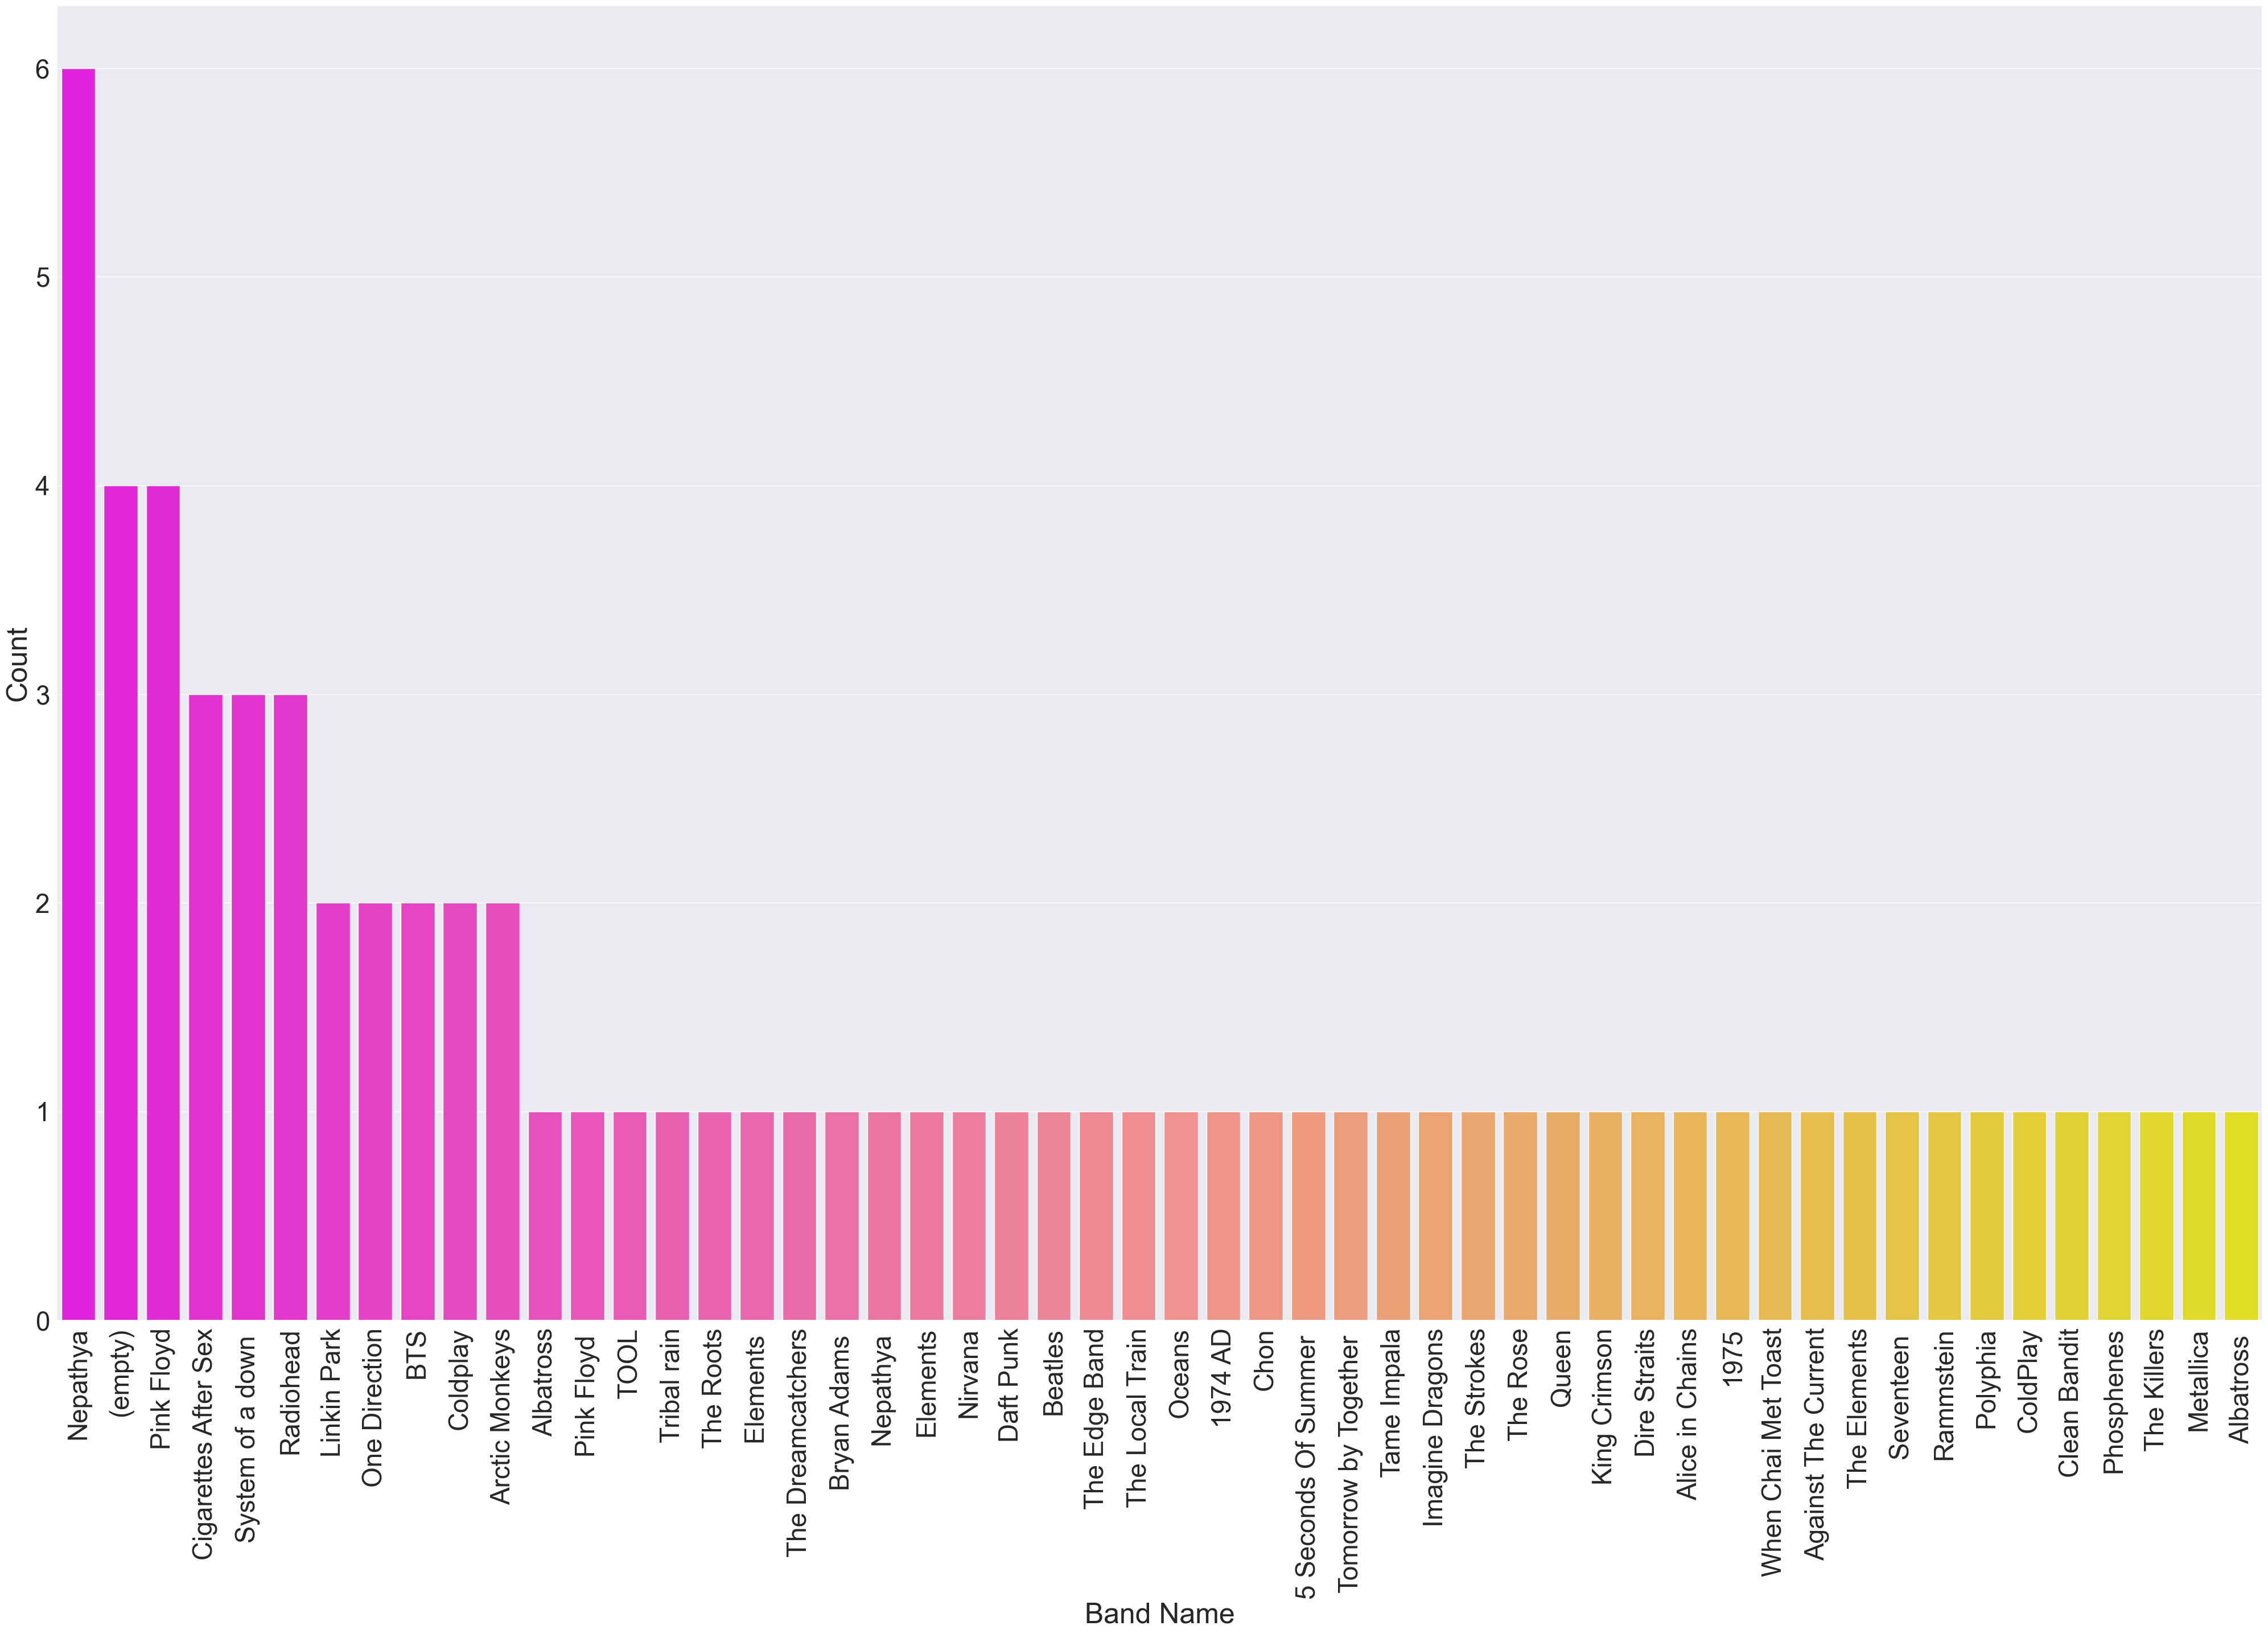

In [539]:
plt.figure(figsize=(50, 30))
sns.set(font_scale=3)
sns.barplot(x="Band Name", y="Count", palette="spring", data=band_df)
plt.xticks(rotation="90")
plt.show()

In [540]:
df["movie_streaming_platform"].value_counts()

Unofficial Streaming Sites (FMovies) etc.         43
Streaming Sites (Netflix, Disney+, Hulu, etc.)    16
Torrent / Download                                 9
YouTube                                            3
Others                                             1
TV / Cable                                         1
Youtube                                            1
Name: movie_streaming_platform, dtype: int64

In [541]:
df["movie_streaming_platform"].replace(
    {
        "Youtube": "YouTube",
        "Unofficial Streaming Sites (FMovies) etc.": "Third Party Streaming Sites",
    },
    inplace=True,
)

In [542]:
df["movie_streaming_platform"].value_counts()

Third Party Streaming Sites                       43
Streaming Sites (Netflix, Disney+, Hulu, etc.)    16
Torrent / Download                                 9
YouTube                                            4
Others                                             1
TV / Cable                                         1
Name: movie_streaming_platform, dtype: int64

In [543]:
df["fav_movie_genre"].value_counts()

Thriller                17
Sci-Fi                  16
Comedy                  11
Romance / Love Story     8
Horror                   6
Anime                    6
Crime                    5
Others                   4
Comedy/Thriller          1
Name: fav_movie_genre, dtype: int64

In [544]:
df["fav_movie_genre"].replace(
    {"Comedy/Thriller": "Comedy", "Romance / Love Story": "Romance"}, inplace=True
)

In [545]:
df["fav_movie_genre"].value_counts()

Thriller    17
Sci-Fi      16
Comedy      12
Romance      8
Horror       6
Anime        6
Crime        5
Others       4
Name: fav_movie_genre, dtype: int64

In [546]:
df["fav_tvseries_genre"].value_counts()

Thriller                16
Comedy                  13
Anime                   10
Crime                   10
Romance / Love Story     8
Sci-Fi                   7
Others                   6
Horror                   2
Korean Drama             1
Thriller/Mystery         1
Name: fav_tvseries_genre, dtype: int64

In [547]:
df["fav_tvseries_genre"].replace(
    {"Thriller/Mystery": "Thriller", "Romance / Love Story": "Romance"}, inplace=True
)

In [548]:
df["fav_tvseries_genre"].value_counts()

Thriller        17
Comedy          13
Anime           10
Crime           10
Romance          8
Sci-Fi           7
Others           6
Horror           2
Korean Drama     1
Name: fav_tvseries_genre, dtype: int64

In [549]:
df["movie_watching_mode"].value_counts()

Laptop / PC       42
Cinema            17
TV                12
Phone / Tablet     2
TV/Laptop          1
Name: movie_watching_mode, dtype: int64

In [550]:
df["movie_watching_mode"].replace({"TV/Laptop": "TV"}, inplace=True)

In [551]:
df["movie_watching_mode"].value_counts()

Laptop / PC       42
Cinema            17
TV                13
Phone / Tablet     2
Name: movie_watching_mode, dtype: int64

In [552]:
df["movie_preference"].value_counts()

Hollywood       49
Bollywood        8
South Indian     7
Korean           6
Others           2
Japanese         2
Name: movie_preference, dtype: int64

In [553]:
df["fav_movie_actor"].value_counts().sort_index()

(empty)                6
Akshay Kumar           1
Al Pacino              1
Alia Bhatt             1
Ana De Armas           2
Brad Pitt              2
Bradley Cooper         1
Christian Bale         2
Cillian Murphy         2
Deepika Padukone       2
Elizabeth Olsen        1
Fahran Aktar           1
Garryold Man           1
Heath Ledger           1
Hero Alom              1
Jake Gyllenhaal        1
Jim Caviezel           1
Joaquin Phoenix        1
Johnny Depp            2
Kartik Aryan           1
Keanu Reeves           1
Leonardo Dicaprio      7
Matthew McConaughey    2
Nawazuddin Siddiqui    1
Park Shin Ye           1
Ranbir Kapoor          2
Robert Downey Jr.      6
Ryan Gosling           2
Ryan Reynolds          2
Samantha               1
Scarlett Johanson      1
Shahid Kapoor          1
Shahrukh Khan          4
Sir Ian McKellen       1
Son Ye Jin             1
Tom Cruise             4
Tom Hanks              1
Tom Hardy              1
Tom Holland            2
Zac Efron              1


In [554]:
df["fav_series_actor"].value_counts().sort_index()

(empty)                7
Aaron Paul             2
Adam Brody             1
Allu arjun             1
Avengers: Endgame      1
Bob Odenkirk           1
Brad Pitt              1
Brie Larson            1
Bryan Cranston         5
Cate Blanchett         1
Cilian Murphy         13
Courtney Cox           1
Deepika Padukone       1
Elizabeth Olsen        1
Giancarlo Esposito     1
Hande Ercel            1
Henry Cavill           2
Ian Somerhalder        1
Idris Alba             1
Issei Hyouda           1
James Gandolfini       1
Jennifier Anniston     1
Jim Caviezel           1
Joaquin Phoenix        1
Johan                  1
Kaley Cuoco            1
Le Jung Sook           1
Lisa kudrow            1
Margot Robbie          1
Matt Leblanc           2
Matthew Perry          1
Millie Bobby Brown     1
Nick Offerman          1
Oscar Isaac            1
Pankaj Tripathi        1
Park Hyun Sik          1
Peter Dinklage         1
Rami Malek             1
Saif Ali Khan          1
Seo Ye JI              1


In [555]:
df["fav_movie"].value_counts().sort_index()

2001: A Space Odyssey                            1
A Silent Voice                                   1
Avatar                                           1
Avengers :Endgame                                1
Avengers: End Game                               1
Avengers: Endgame                                2
Avengers: Infinity War                           1
Barbie                                           1
Barbie                                           1
Begin Again                                      1
Casablanca                                       1
DJ                                               1
Django Unchained                                 1
Dune                                             1
Fight Club                                       1
Godfather                                        1
Grand Budapest Hotel                             1
Green mile                                       1
Harry Potter                                     2
How to lose a guy in 1 days    